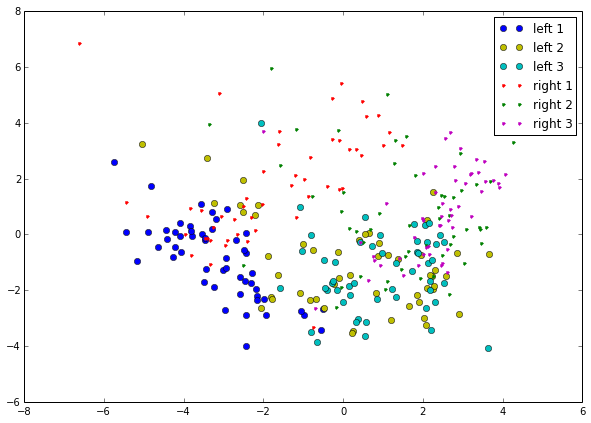

In [94]:
import numpy as np
import dataIO
from sklearn import svm, preprocessing
from sklearn.decomposition import PCA
from matplotlib import pyplot as pl
%matplotlib inline
reload(dataIO)

def contains_spikes(values):
    for value in values:
        if value>40000:
            return True
    
    return False

left = []
right = []
for i in range(3):
    left_s, right_s = dataIO.read_twothumb(7, i) # USERID
    
    left_filt = []
    right_filt = []
    for j in range(len(left_s)):
        if not contains_spikes(left_s[j]):
            left_filt.append(left_s[j])
        
        if not contains_spikes(right_s[j]):
            right_filt.append(right_s[j])
    
    left.append(left_filt)
    right.append(right_filt)
    
X = np.array(left[0]+left[1]+left[2]+right[0]+right[1]+right[2])

scaler = preprocessing.StandardScaler().fit(X)   
X_scaled = scaler.transform(X)

pca = PCA(n_components=2)
data = pca.fit_transform(X_scaled)

len_sum = 0
left1 = np.array(data[:len(left[0])]).T
len_sum += len(left[0])
left2 = np.array(data[len_sum:len_sum+len(left[1])]).T
len_sum += len(left[1])
left3 = np.array(data[len_sum:len_sum+len(left[2])]).T
len_sum += len(left[2])
right1 = np.array(data[len_sum:len_sum+len(right[0])]).T
len_sum += len(right[0])
right2 = np.array(data[len_sum:len_sum+len(right[1])]).T
len_sum += len(right[1])
right3 = np.array(data[len_sum:len_sum+len(right[2])]).T

pl.figure(figsize=(10, 7), dpi=80)

line1 = pl.plot(left1[0], left1[1], marker='o', color='b', ls='', label='left 1')
line2 = pl.plot(left2[0], left2[1], marker='o', color='y', ls='', label='left 2')
line3 = pl.plot(left3[0], left3[1], marker='o', color='c', ls='', label='left 3')
line4 = pl.plot(right1[0], right1[1], marker='.', color='r', ls='', label='right 1')
line5 = pl.plot(right2[0], right2[1], marker='.', color='g', ls='', label='right 2')
line6 = pl.plot(right3[0], right3[1], marker='.', color='m', ls='', label='right 3')

pl.legend(loc='best')
pl.show()